In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from matplotlib.ticker import ScalarFormatter
import time
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv("/home/nibba/Documents/usth/machine_learning2/FinalProject/Final-ML2/Supplement_Sales_Weekly_Expanded.csv")

In [3]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [5]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [6]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [7]:
df["Date"]= pd.to_datetime(df["Date"])
df["Date"]

0      2020-01-06
1      2020-01-06
2      2020-01-06
3      2020-01-06
4      2020-01-06
          ...    
4379   2025-03-31
4380   2025-03-31
4381   2025-03-31
4382   2025-03-31
4383   2025-03-31
Name: Date, Length: 4384, dtype: datetime64[ns]

In [8]:
df["Date"].head(30)

0    2020-01-06
1    2020-01-06
2    2020-01-06
3    2020-01-06
4    2020-01-06
5    2020-01-06
6    2020-01-06
7    2020-01-06
8    2020-01-06
9    2020-01-06
10   2020-01-06
11   2020-01-06
12   2020-01-06
13   2020-01-06
14   2020-01-06
15   2020-01-06
16   2020-01-13
17   2020-01-13
18   2020-01-13
19   2020-01-13
20   2020-01-13
21   2020-01-13
22   2020-01-13
23   2020-01-13
24   2020-01-13
25   2020-01-13
26   2020-01-13
27   2020-01-13
28   2020-01-13
29   2020-01-13
Name: Date, dtype: datetime64[ns]

In [9]:
df.drop(columns="Location", inplace=True)

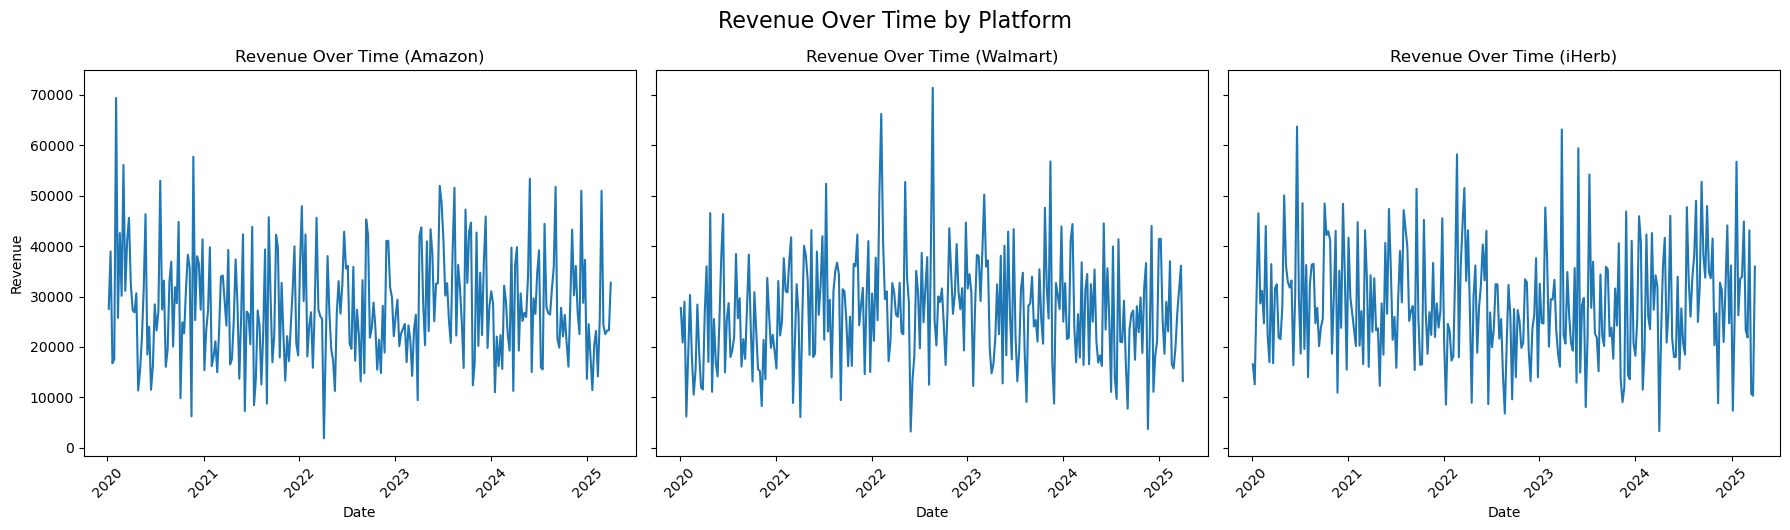

In [10]:
platforms = ["Amazon", "Walmart", "iHerb"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, platform in enumerate(platforms):
    sub_df = df[df['Platform'] == platform].copy()  
    
    df_sum = sub_df.groupby("Date")["Revenue"].sum().reset_index()

    
    sns.lineplot(x="Date", y="Revenue", data=df_sum, ax=axes[i])
    axes[i].set_title(f"Revenue Over Time ({platform})")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Revenue Over Time by Platform", fontsize=16, y=1.05)
plt.show()


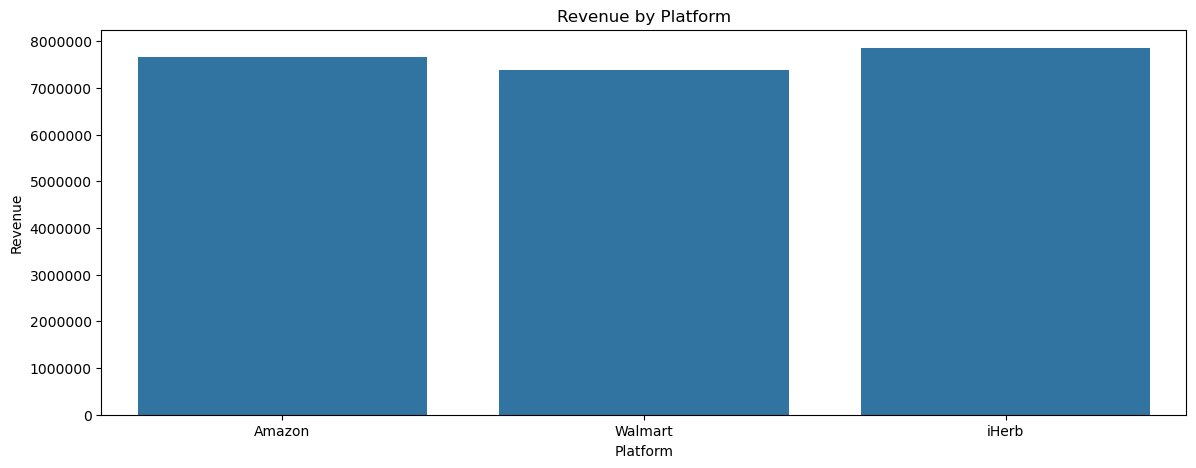

In [11]:
df_location = df.groupby("Platform")["Revenue"].sum().reset_index()
plt.figure(figsize=(14, 5))
sns.barplot(x='Platform', y='Revenue', data=df_location)  # replace df_grouped with your aggregated dataframe
plt.title("Revenue by Platform")
plt.xlabel("Platform")
plt.ylabel("Revenue")

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

plt.show()

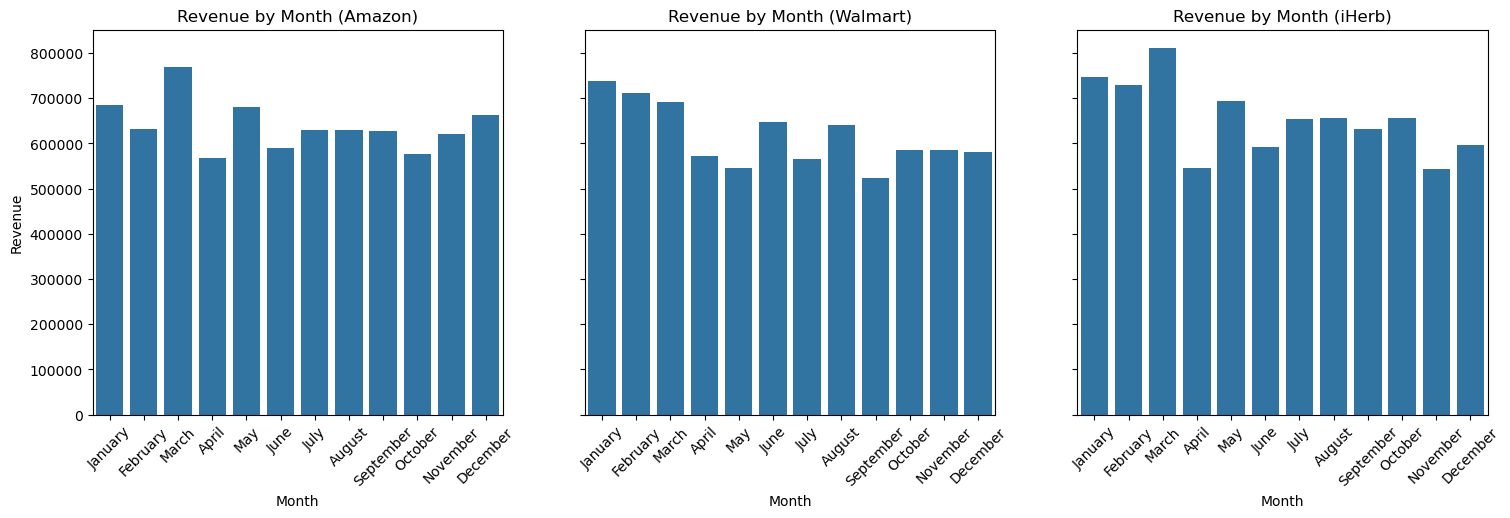

In [12]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

platforms = ["Amazon", "Walmart", "iHerb"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, platform in enumerate(platforms):
    df_platform = df[df["Platform"] == platform].copy()
    df_platform["Month"] = df_platform["Date"].dt.month_name()

    monthly_sales = df_platform.groupby("Month")["Revenue"].sum().reset_index()
    monthly_sales["Month"] = pd.Categorical(monthly_sales["Month"], categories=month_order, ordered=True)
    monthly_sales = monthly_sales.sort_values("Month")

    sns.barplot(ax=axes[i], data=monthly_sales, x="Month", y="Revenue")
    axes[i].set_title(f"Revenue by Month ({platform})")
    axes[i].set_xlabel("Month")
    axes[i].tick_params(axis='x', rotation=45)


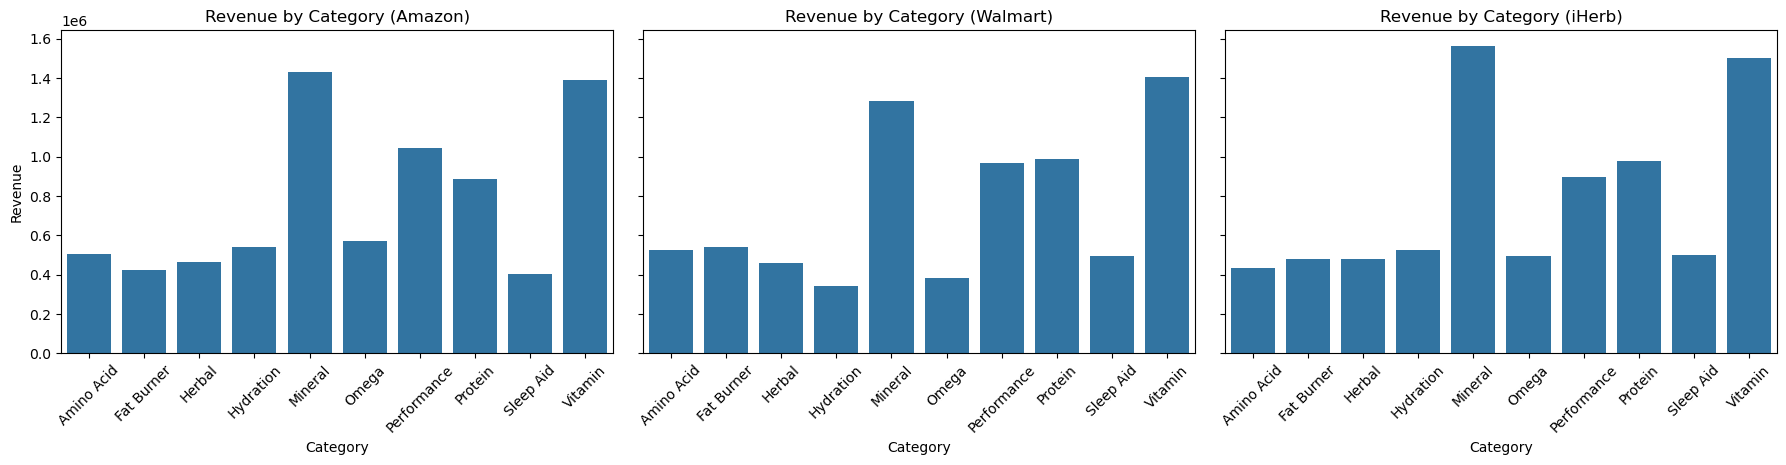

In [13]:
df_cat = df.groupby(["Platform", "Category"])["Revenue"].sum().reset_index()

platforms = df_cat["Platform"].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, platform in zip(axes, platforms):
    data = df_cat[df_cat["Platform"] == platform]
    sns.barplot(x="Category", y="Revenue", data=data, ax=ax)
    ax.set_title(f"Revenue by Category ({platform})")
    ax.set_xlabel("Category")
    ax.set_ylabel("Revenue")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


In [14]:
for platform in ["Amazon", "Walmart", "iHerb"]:  

    sub_df= df[(df['Platform'] == platform)]
    sub_df.drop(columns="Platform",inplace=True)
    df_top10 = sub_df.groupby("Product Name")['Revenue'].sum().nlargest(10)
    print(f"Top 10 best-selling products in {platform}:")
    print(df_top10)

Top 10 best-selling products in Amazon:
Product Name
Fish Oil              573676.84
Creatine              559664.62
Electrolyte Powder    540690.81
Zinc                  526832.30
BCAA                  503621.03
Biotin                491326.38
Pre-Workout           486510.55
Multivitamin          485217.72
Ashwagandha           466368.82
Iron Supplement       463291.70
Name: Revenue, dtype: float64
Top 10 best-selling products in Walmart:
Product Name
Green Tea Extract    539236.27
BCAA                 526594.40
Pre-Workout          524685.74
Whey Protein         506531.30
Melatonin            493098.76
Collagen Peptides    480716.63
Biotin               479746.96
Multivitamin         472496.03
Ashwagandha          461231.65
Vitamin C            453117.58
Name: Revenue, dtype: float64
Top 10 best-selling products in iHerb:
Product Name
Iron Supplement       578064.04
Vitamin C             554095.51
Electrolyte Powder    526466.92
Biotin                515725.28
Zinc                  5

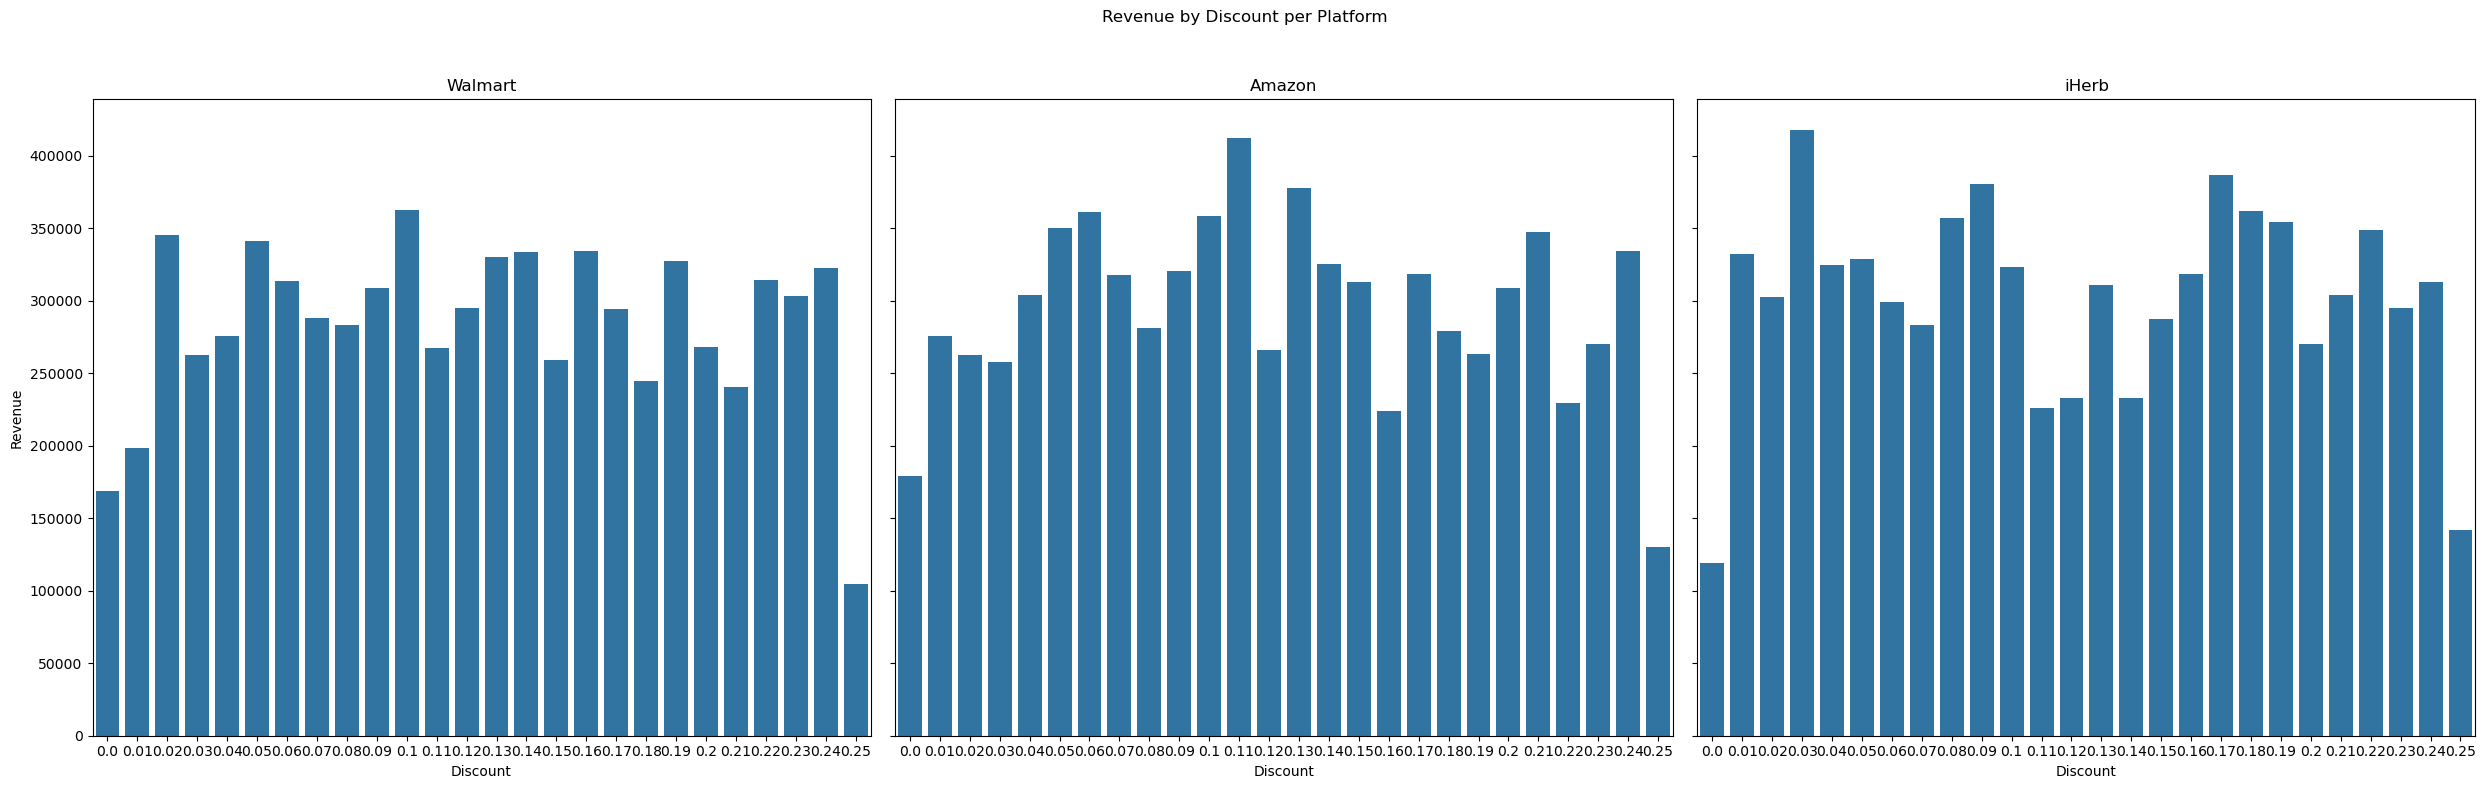

It show that no discount or a very high discount might not
be as effective in selling as moderate discounts


In [15]:
platforms = df["Platform"].unique()


fig, axes = plt.subplots(1, 3, figsize=(25, 8), sharey=True)
fig.suptitle("Revenue by Discount per Platform")


for ax, platform in zip(axes, platforms):
    df_platform = df[df["Platform"] == platform]
    df_discount = df_platform.groupby("Discount")["Revenue"].sum().reset_index()
    sns.barplot(x="Discount", y="Revenue", data=df_discount, ax=ax)
    ax.set_title(f"{platform}")
    ax.set_xlabel("Discount")
    ax.set_ylabel("Revenue")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print("It show that no discount or a very high discount might not\nbe as effective in selling as moderate discounts")

PREPROCESSING

In [16]:
df['Category'].value_counts()##no outlier found


Category
Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: count, dtype: int64

In [17]:
df['Product Name'].value_counts()##no outlier found

Product Name
Whey Protein          274
Vitamin C             274
Fish Oil              274
Multivitamin          274
Pre-Workout           274
BCAA                  274
Creatine              274
Zinc                  274
Collagen Peptides     274
Magnesium             274
Ashwagandha           274
Melatonin             274
Biotin                274
Green Tea Extract     274
Iron Supplement       274
Electrolyte Powder    274
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 308.4+ KB


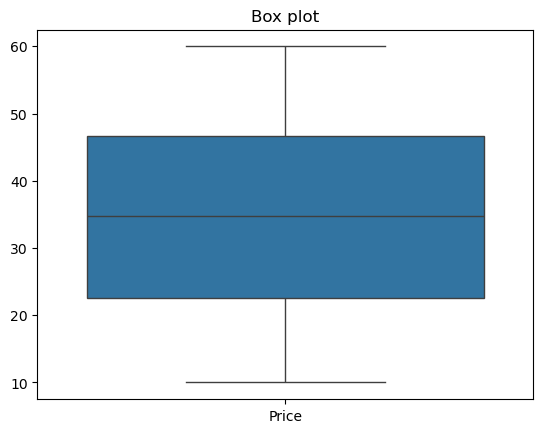

In [19]:
sns.boxplot(data = df[['Price']])
plt.title("Box plot")
plt.show()

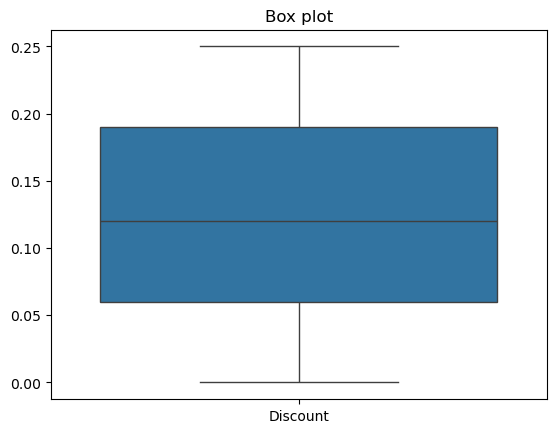

In [20]:
sns.boxplot(data = df[['Discount']])
plt.title("Box plot")
plt.show()

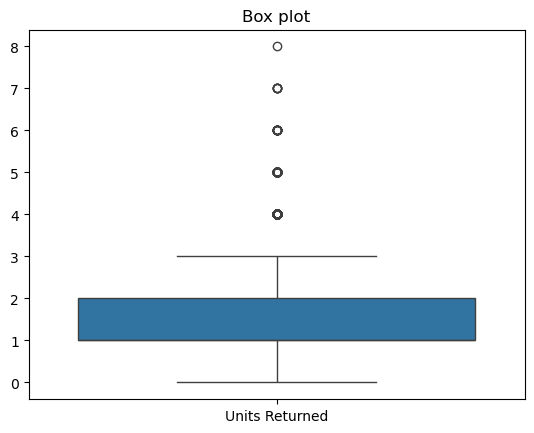

4,5,6,7,8 are outliers in Units Returned column


In [21]:
sns.boxplot(data = df[['Units Returned']])
plt.title("Box plot")
plt.show()

print("4,5,6,7,8 are outliers in Units Returned column")

In [22]:
df["Units Returned"].value_counts()

Units Returned
1    1403
2    1120
0     986
3     561
4     214
5      75
6      19
7       5
8       1
Name: count, dtype: int64

In [23]:
df = df[~df["Units Returned"].isin([7, 8,5,6,4])]


IQR-based detection
(is a common technique for detecting outliers in numerical data using the Interquartile Range)

In [24]:
# for y in ['Price','Discount','Units Returned']:
#     feature=pd.DataFrame(df[y])
#     Q1=feature.quantile(0.25)
#     Q3=feature.quantile(0.75)
#     IQ_range=Q3-Q1
#     lower_limit = Q1-1.5*IQ_range
#     upper_limit = Q3+1.5*IQ_range



#     outliers =[]
#     for i in range(0,len(feature)):
#         ft = feature.iloc[i, 0]
#         if(ft>upper_limit[0] or ft<lower_limit[0]):
#             outliers.append(ft)
#         else:
#             continue   
#     print(y)     
#     if(len(outliers)==0):
#         print("No outlier found")
#     else:
#         print(outliers)        
                    

In [25]:
df.drop(["Category"],axis=1,inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['First_week_day'] = df['Date'].dt.day
df.drop(["Date"],axis=1,inplace=True)


In [26]:
df["Platform"].head()

0    Walmart
1     Amazon
2     Amazon
3    Walmart
4      iHerb
Name: Platform, dtype: object

In [27]:
le = LabelEncoder()

df["Platform"]=le.fit_transform(df["Platform"])


In [28]:
df

,Product Name,Units Sold,Price,Revenue,Discount,Units Returned,Platform,Year,Month,First_week_day
0,Whey Protein,143,31.98,4573.14,0.03,2,1,2020,1,6
1,Vitamin C,139,42.51,5908.89,0.04,0,0,2020,1,6
2,Fish Oil,161,12.91,2078.51,0.25,0,0,2020,1,6
3,Multivitamin,140,16.07,2249.80,0.08,0,1,2020,1,6
4,Pre-Workout,157,35.47,5568.79,0.25,3,2,2020,1,6
...,...,...,...,...,...,...,...,...,...,...
4379,Melatonin,160,47.79,7646.40,0.21,1,2,2025,3,31
4380,Biotin,154,38.12,5870.48,0.22,1,1,2025,3,31
4381,Green Tea Extract,139,20.40,2835.60,0.12,3,2,2025,3,31
4382,Iron Supplement,154,18.31,2819.74,0.23,2,0,2025,3,31


In [29]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[["Product Name"]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Product Name']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(["Product Name"],axis=1,inplace=True)



In [30]:
df.drop(["Units Sold"],axis=1,inplace=True)

In [31]:
df.dropna(inplace=True)

In [32]:
df

,Price,Revenue,Discount,Units Returned,Platform,Year,Month,First_week_day,Product Name_Ashwagandha,Product Name_BCAA,...,Product Name_Fish Oil,Product Name_Green Tea Extract,Product Name_Iron Supplement,Product Name_Magnesium,Product Name_Melatonin,Product Name_Multivitamin,Product Name_Pre-Workout,Product Name_Vitamin C,Product Name_Whey Protein,Product Name_Zinc
0,31.98,4573.14,0.03,2.0,1.0,2020.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,42.51,5908.89,0.04,0.0,0.0,2020.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.91,2078.51,0.25,0.0,0.0,2020.0,1.0,6.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.07,2249.80,0.08,0.0,1.0,2020.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,35.47,5568.79,0.25,3.0,2.0,2020.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,52.70,8063.10,0.24,1.0,2.0,2024.0,11.0,18.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4065,13.60,2067.20,0.11,2.0,2.0,2024.0,11.0,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4066,15.37,1890.51,0.05,3.0,0.0,2024.0,11.0,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4067,13.22,1983.00,0.10,2.0,2.0,2024.0,11.0,18.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# print("Platform: 0 is Amazon, 1 is Walmart, 2 is iHerb")
# print("\n")

# for platform in [0, 1, 2]:  # 0 is Amazon, 1 is Walmart, 2 is iHerb

#     sub_df= df[(df['Platform'] == platform)]
#     sub_df.drop(columns="Platform",inplace=True)

#     sub_df.dropna(inplace=True)
#     X = sub_df.drop(columns="Revenue")
#     y = sub_df["Revenue"]
    

    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     scaler = StandardScaler()
#     scaler.fit_transform(X_train, X_test)
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"Platform: {platform}")
#     print("Mean Squared Error (MSE):", mse)
#     print("R-squared (R²):", r2)


In [34]:
start_time = time.time()
sub_df= df[(df['Platform'] == 0)]  # Assuming 0 is Amazon
sub_df.drop(columns="Platform",inplace=True)

sub_df.dropna(inplace=True)
X = sub_df.drop(columns="Revenue")
y = sub_df["Revenue"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train, X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Platform: Amazon")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Elapsed Time:", elapsed_time)


Platform: Amazon
Mean Squared Error (MSE): 247315.94545715983
R-squared (R²): 0.953059163958822
Elapsed Time: 0.01587080955505371


In [35]:
start_time = time.time()
sub_df= df[(df['Platform'] == 1)]  # Assuming 1 is Walmart
sub_df.drop(columns="Platform",inplace=True)

sub_df.dropna(inplace=True)
X = sub_df.drop(columns="Revenue")
y = sub_df["Revenue"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train, X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Platform: Walmart")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Elapsed Time:", elapsed_time)

Platform: Walmart
Mean Squared Error (MSE): 273175.22178363975
R-squared (R²): 0.9426452268495876
Elapsed Time: 0.01813650131225586


In [36]:
start_time = time.time()
sub_df= df[(df['Platform'] == 2)]  # Assuming 2 is iHerb
sub_df.drop(columns="Platform",inplace=True)

sub_df.dropna(inplace=True)
X = sub_df.drop(columns="Revenue")
y = sub_df["Revenue"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train, X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Platform: iHerb")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Elapsed Time:", elapsed_time)

Platform: iHerb
Mean Squared Error (MSE): 216049.96997989915
R-squared (R²): 0.9518076779539059
Elapsed Time: 0.009643793106079102
